# Dataset Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like leaflets three, let it be'' for Poisonous Oak and Ivy.

# Problem Statement

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied).
Also, if some data pre-processing is necessary do that as well.

# Attribute Information

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises?: bruises=t,no=f

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading Dataset
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# number of rows and columns:
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows:  8124
Number of columns:  23


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# description of text data
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# EDA

In [6]:
def col_plt(col, hue=None, color=['blue', 'pink'], labels=None):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(x=col, hue=hue, palette=color, data=data, ax=ax)
    ax.set(title=f'Mushroom {col.title()} Quantity', xlabel=f'{col.title()}', ylabel='Quantity')
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisnous', 'Edible'), loc=0)

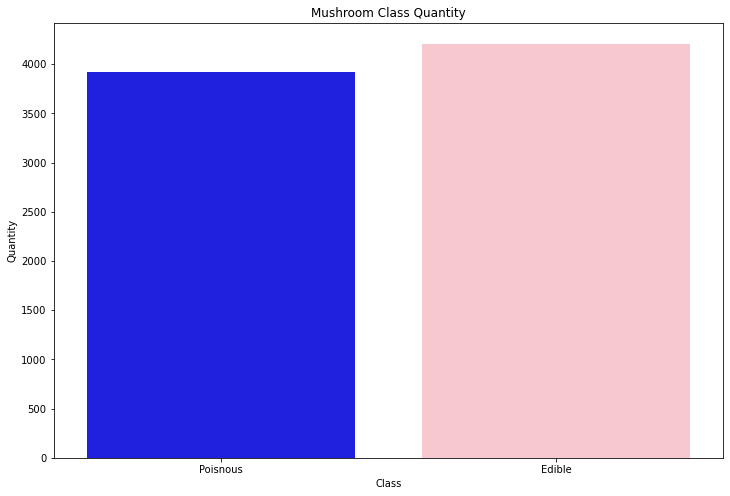

In [7]:
class_label = ['Poisnous','Edible']
col_plt(col='class', labels=class_label)

Edible mushrooms are more in Quantity than Poisnous.

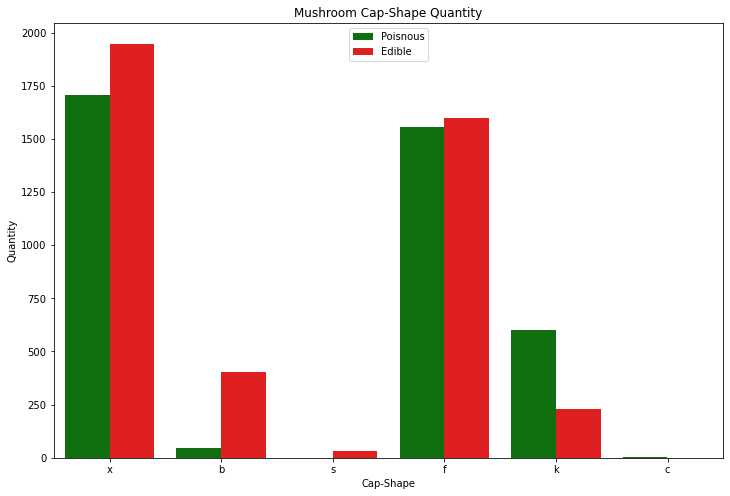

In [8]:
shape_dict = {'bell':'b','conical':'c','convex':'x','flat':'f', 'knobbed':'k','sunken':'s'}
labels=['convex','bell','sunken','flat','knobbed','conical']
col_plt(col='cap-shape', hue='class', color=['green','red'])

Mushrooms with convex cap-shape are more in number where edible mushrooms are more, whereas conical is the least.
Among knobbed and canonical cap-shaped poisnous mushrooms are more in number than edible.  

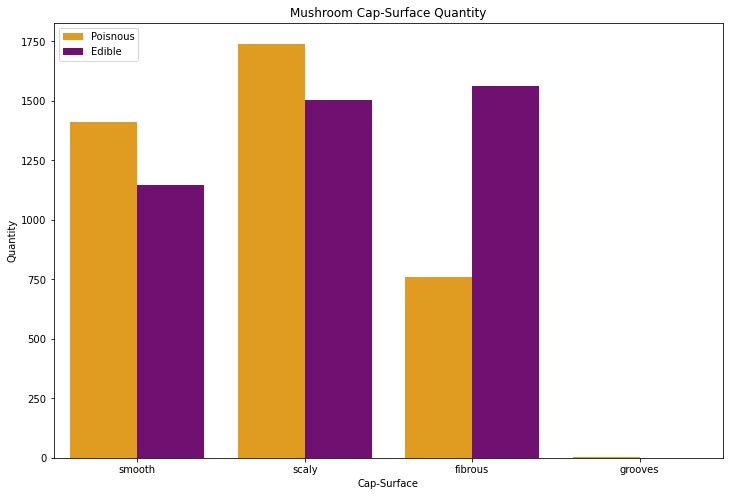

In [9]:
surf_dict = {'smooth':'s','scaly':'y','fibrous':'f','grooves':'g'}
col_plt(col='cap-surface', hue='class', color=['orange','purple'], labels=surf_dict)

Most of the mushrooms have scaly cap-surface whereas least have grooves cap-shape.
Among mushrooms with scaly and smooth cap-surface, poisnous are more in number.
Among fibrous cap-surface edible mushrooms are more.

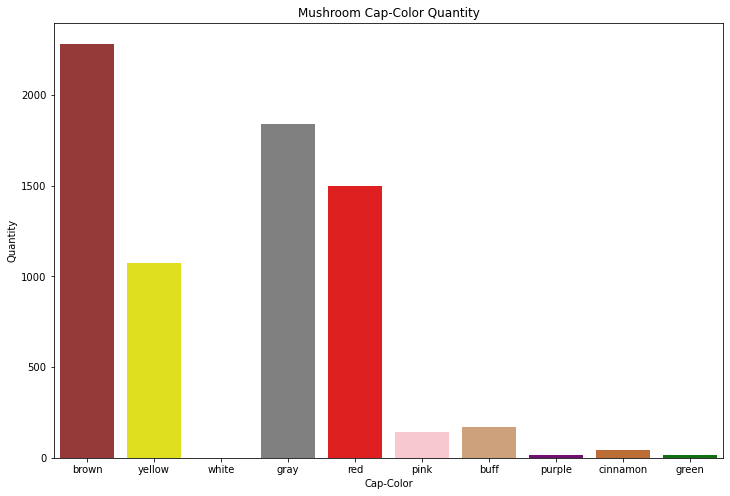

In [10]:
color_dict = {'brown':'n','yellow':'y','white':'w','gray':'g','red':'e','pink':'p','buff':'b','purple':'u','cinnamon':'c','green':'r'}
colors=['brown','yellow','white','gray','red','pink','#DAA06D','purple','#D2691E','green']
col_plt(col='cap-color', color=colors, labels=color_dict)

Most of the mushrooms are brown, gray and red in colour. White, purple and green mushrooms are very rare.

In [11]:
def get_labels(order, dic):
    labels=[]
    for values in order:
        for key, value in dic.items():
            if value == values:
                labels.append(key)
    return labels

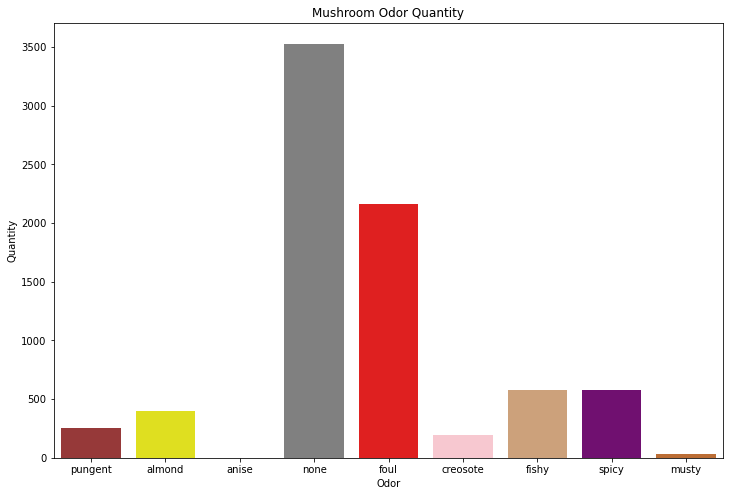

In [12]:
odor_dict = {'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f','musty':'m','none':'n','pungent':'p','spicy':'s'}
order = ['p','a','l','n','f','c','y','s','m']
labels = get_labels(order, odor_dict)
col_plt(col='odor', color=colors, labels=labels)

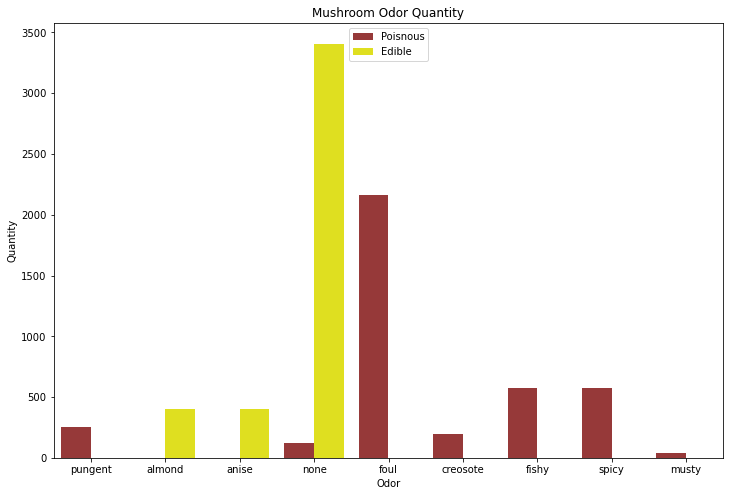

In [13]:
col_plt(col='odor', hue='class', color=colors, labels=labels)

Most of the edible mushrooms are odorless whereas poisnous mushrooms have a foul smell.

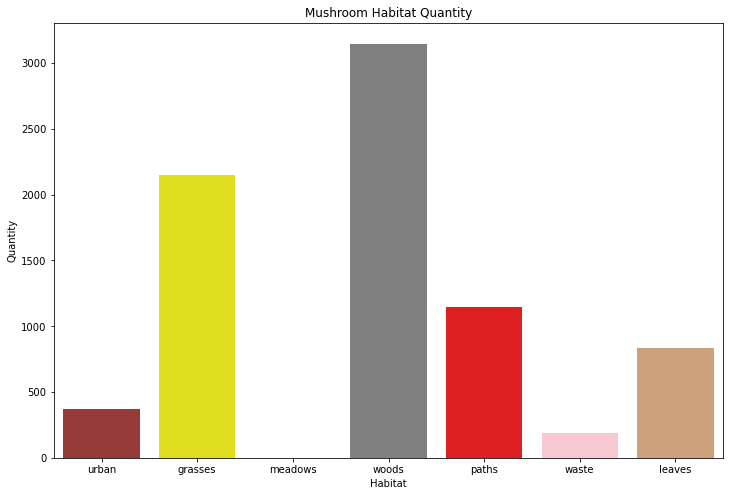

In [14]:
habitat_dict={'grasses':'g','leaves':'l','meadows':'m','paths':'p', 'urban':'u','waste':'w','woods':'d'}
order = ['u','g','m','d','p','w','l']
labels=get_labels(order,habitat_dict)
col_plt(col='habitat', color=colors, labels=labels)

Most of the mushrooms grow in woods and grasses.

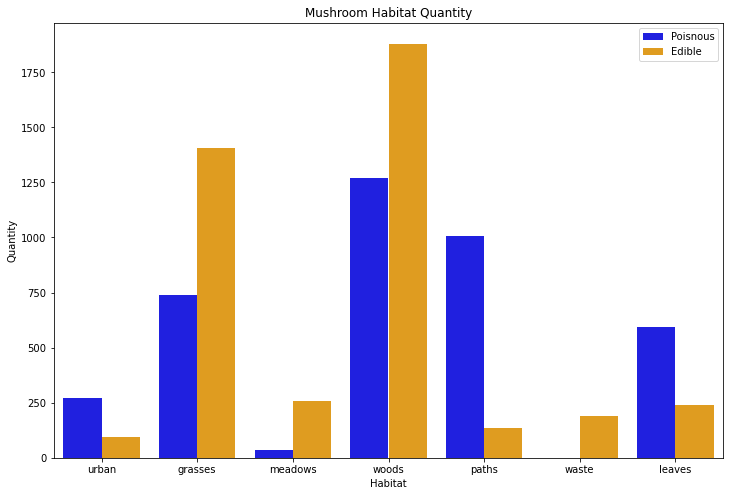

In [15]:
col_plt(col='habitat', hue='class', color=['blue','orange'], labels=labels)

Though comparatively less number of mushrooms grow on paths and leaves, most of them are poisnous.

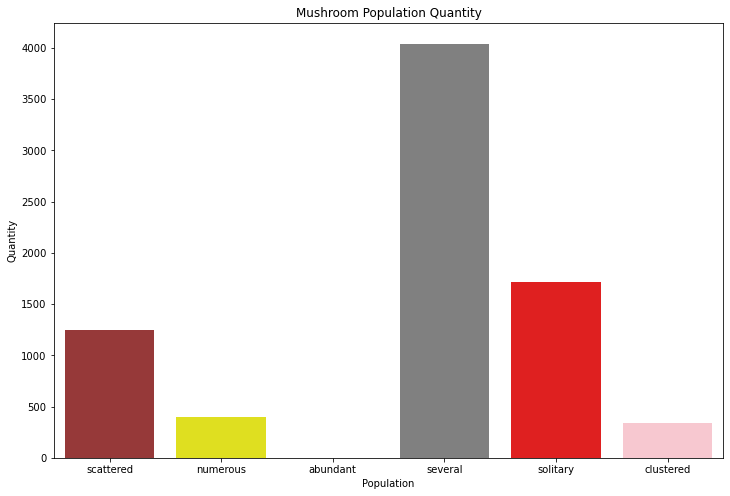

In [16]:
population_dict={'abundant':'a','clustered':'c','numerous':'n','scattered':'s','several':'v','solitary':'y'}
order=['s','n','a','v','y','c']
labels=get_labels(order,population_dict)
col_plt(col='population', color=colors, labels=labels)

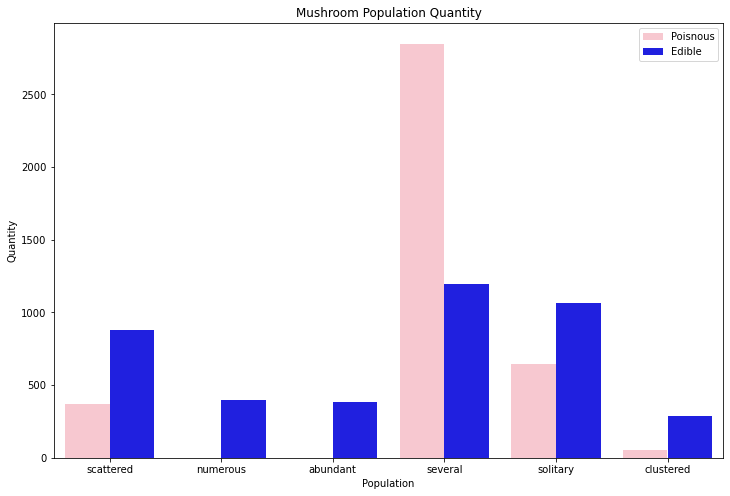

In [17]:
col_plt(col='population', hue='class', color=['pink','blue'], labels=labels)

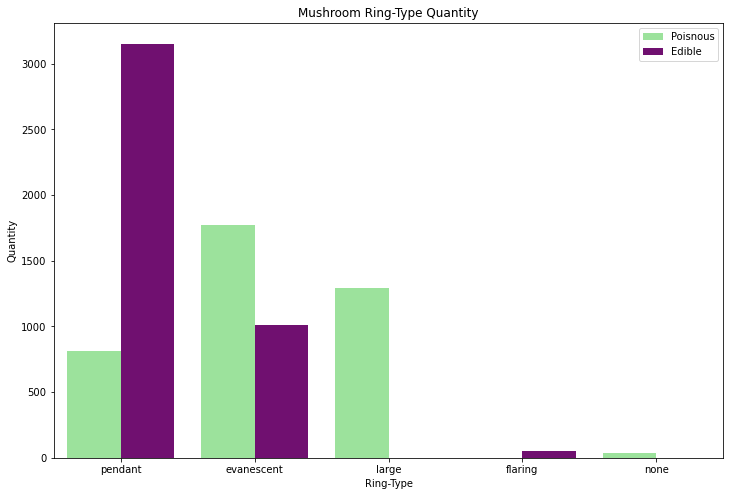

In [18]:
ring_dict={'cobwebby':'c','evanescent':'e','flaring':'f','large':'l','none':'n','pendant':'p','sheathing':'s','zone':'z'}
order=['p','e','l','f','n']
labels=get_labels(order,ring_dict)
col_plt(col='ring-type', hue='class', color=['LightGreen','purple'], labels=labels)

Most of the edible mushrooms have a pendant ring type whereas most of the poisnous mushrooms are having evanescent and large ring types.

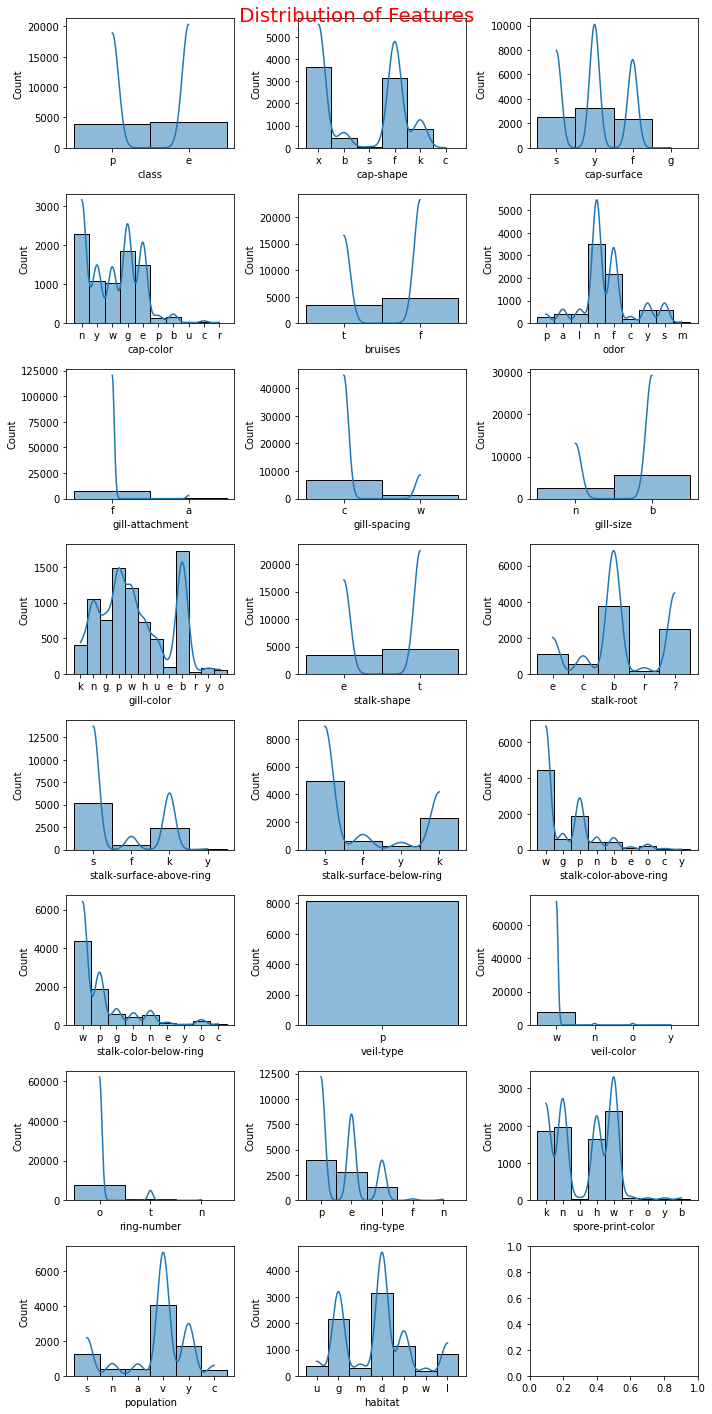

In [19]:
# Distribution of features

fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(10,20))
ax = ax.flatten()
for x, column in enumerate(data.columns):
    sns.histplot(data[column], ax=ax[x], kde=True)
plt.suptitle('Distribution of Features', fontsize=20, color='red')
plt.tight_layout()
plt.show()

## PreProcessing

In [20]:
# checking for duplicates
data.duplicated().sum()

0

In [21]:
# checking for null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [22]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values in our dataset

From the distribution curve, column 'veil-types' seems to have same value in all samples.

In [23]:
data[['veil-type']].head(10)

,veil-type
0,p
1,p
2,p
3,p
4,p
5,p
6,p
7,p
8,p
9,p


In [24]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [25]:
# droping 'veil-type' as this feature have same value for samples.
# This provide no information that allows a machine learning model to discriminate or predict a target

data.drop(['veil-type'],axis=1, inplace=True)

### Encoding

Since all the columns in our dataset are categorical, we do label encoding:

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_en = data.copy()
for column in data_en.columns:
    data_en[column]=le.fit_transform(data_en[column])
    le_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(column,':',le_map)

class : {'e': 0, 'p': 1}
cap-shape : {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
cap-surface : {'f': 0, 'g': 1, 's': 2, 'y': 3}
cap-color : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
bruises : {'f': 0, 't': 1}
odor : {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-attachment : {'a': 0, 'f': 1}
gill-spacing : {'c': 0, 'w': 1}
gill-size : {'b': 0, 'n': 1}
gill-color : {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
stalk-shape : {'e': 0, 't': 1}
stalk-root : {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
stalk-surface-above-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-surface-below-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-color-above-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
stalk-color-below-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
veil-color : {'n': 0, 'o': 1, 'w': 2, 'y': 3}
ring-number 

In [27]:
data_en.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


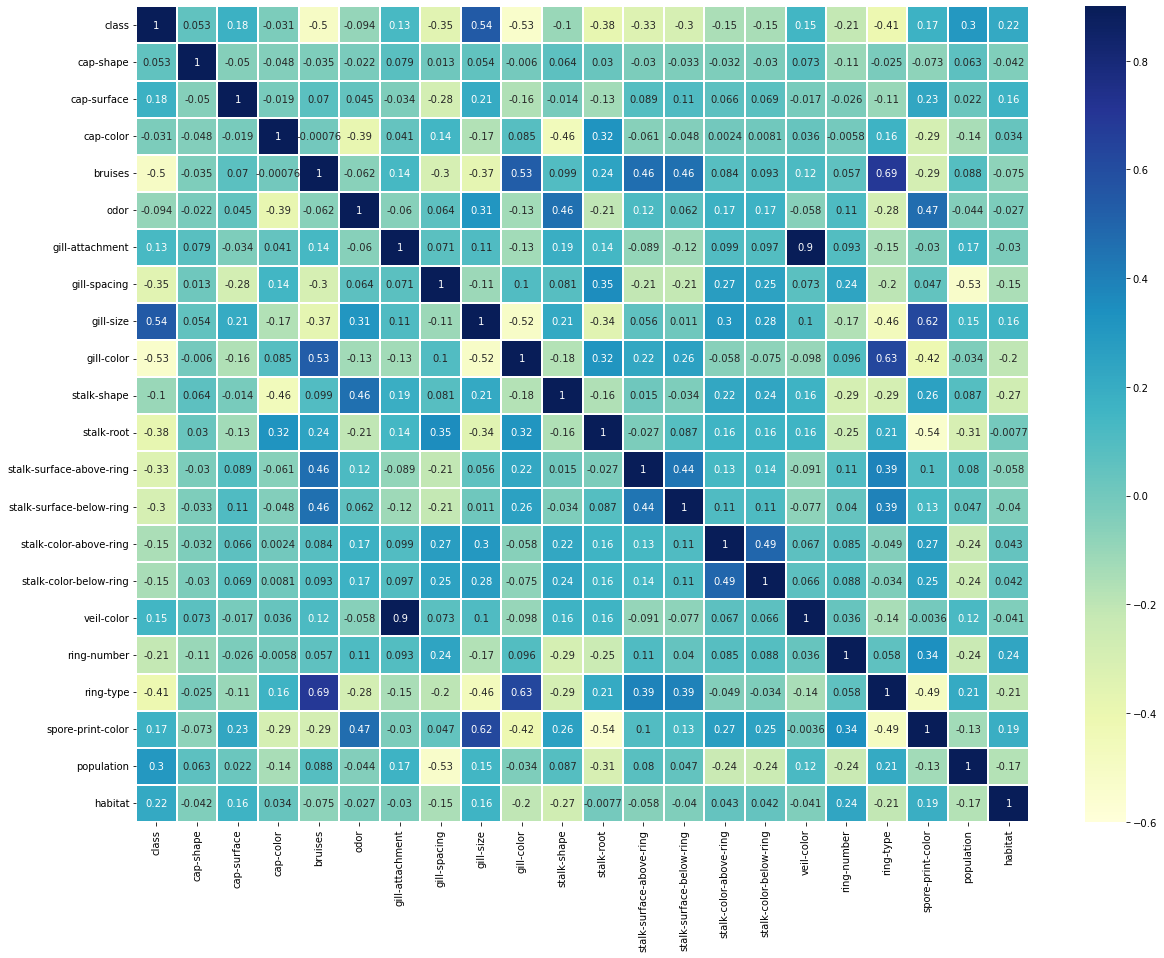

In [28]:
# Correlation of features
plt.subplots(figsize=(20,15))
sns.heatmap(data=data_en.corr(), vmin=-0.6, vmax=0.9, linewidth=0.2, annot=True, cmap='YlGnBu')
plt.show()

veil-color is having very high positive correlation with gill-attachment.
Some features are slightly dependent on some other features.

In [29]:
#'veil-color' is very high positive correlation with 'gill-attachment'
# droping 'gill-attachment'
data.drop(['gill-attachment'], axis=1, inplace=True)

## Data Preparation

In [30]:
# Spliting the dataset into features and target
y = data_en['class']
X = data_en.drop(['class'], axis=1)

print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (8124, 21)
shape of y:  (8124,)


As we already see in data description, there no much variation in data.
So we proceed without scaling.

In [31]:
#checking target balance
y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [32]:
y.value_counts(normalize=True)

0    0.517971
1    0.482029
Name: class, dtype: float64

Its a balanced dataset

In [33]:
#spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (6093, 21)
Shape of X_test:  (2031, 21)
Shape of y_train:  (6093,)
Shape of y_test:  (2031,)


# Model Building

In [34]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## a) Gaussian NaiveBayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: GaussianNB
Confusion Matrix: 
 [[958  82]
 [ 67 924]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031

F1 Score:  0.9266


## b) MultinomialNB Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: MultinomialNB
Confusion Matrix: 
 [[973  67]
 [322 669]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83      1040
           1       0.91      0.68      0.77       991

    accuracy                           0.81      2031
   macro avg       0.83      0.81      0.80      2031
weighted avg       0.83      0.81      0.80      2031

F1 Score:  0.8041


## c) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: LogisticRegression
Confusion Matrix: 
 [[989  51]
 [ 51 940]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

F1 Score:  0.9497


## d) kNN

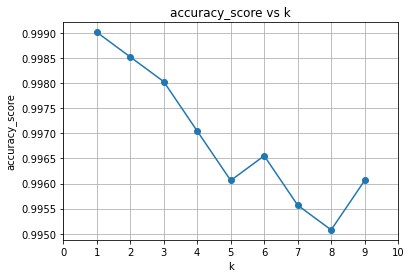

In [38]:
# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(0.0, 11.0, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

In [39]:
clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: KNeighborsClassifier
Confusion Matrix: 
 [[1039    1]
 [   1  990]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

F1 Score:  0.999


## e) SVM 

In [40]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: SVC
Confusion Matrix: 
 [[1038    2]
 [  14  977]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1040
           1       1.00      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

F1 Score:  0.9921


100% accuracy clearly shows overfitting. We will try to do some more feature reduction now.

In [41]:
#Recursive Feature Elimination with Cross-Validation

from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")
min_features_to_select = 1
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=2,
    scoring="f1",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features :",rfecv.n_features_)

Optimal number of features : 11


In [42]:
rfecv.get_support()

array([False, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False])

In [43]:
feature_selected = X_train.columns[rfecv.get_support()]
feature_selected

Index(['bruises', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'veil-color', 'ring-number', 'ring-type'],
      dtype='object')

In [44]:
X_train_rfe = rfecv.transform(X_train)
X_test_rfe = rfecv.transform(X_test)

In [45]:
clf = SVC()
clf.fit(X_train_rfe, y_train)

y_pred = clf.predict(X_test_rfe)


print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: SVC
Confusion Matrix: 
 [[1032    8]
 [  15  976]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1040
           1       0.99      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

F1 Score:  0.9887


## f) Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: DecisionTreeClassifier
Confusion Matrix: 
 [[1040    0]
 [   0  991]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

F1 Score:  1.0


## g) Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: RandomForestClassifier
Confusion Matrix: 
 [[1040    0]
 [   0  991]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

F1 Score:  1.0


## h) Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: GradientBoostingClassifier
Confusion Matrix: 
 [[1040    0]
 [   0  991]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

F1 Score:  1.0


**Most of the Models are overfitted**

# Fine Tuning of MultinomialNB

In [49]:
# default parameters of GaussianNB

MNB = MultinomialNB()
MNB.get_params(deep=True)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [52]:
# finding best params using GridSearchCV

NB_params = {'alpha': np.linspace(0.1, 2.0, 10),
             'fit_prior': [True, False]}

from sklearn.model_selection import GridSearchCV
gs_MNB = GridSearchCV(estimator=MNB,
                      param_grid=NB_params,
                      cv=2,
                      scoring='f1',
                      n_jobs=4,
                      verbose=1,
                      return_train_score=True)

gs_MNB.fit(X_train, y_train)

print('Best parameters: ',gs_MNB.best_params_)
print('Score: ',gs_MNB.best_score_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameters:  {'alpha': 0.1, 'fit_prior': False}
Score:  0.7685366449752639


In [53]:
y_hyp_pred = gs_MNB.predict(X_test)

print('Classification Model: {}'.format(gs_MNB.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_hyp_pred))
print('Classification Report: \n',classification_report(y_test,y_hyp_pred))
print('F1 Score: ',f1_score(y_test, y_hyp_pred, average='macro').round(4))

Classification Model: GridSearchCV
Confusion Matrix: 
 [[965  75]
 [314 677]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      1040
           1       0.90      0.68      0.78       991

    accuracy                           0.81      2031
   macro avg       0.83      0.81      0.80      2031
weighted avg       0.83      0.81      0.81      2031

F1 Score:  0.8045
